### Homework 2 - Juan Quinones

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

## Conceptual

1. Select one: Assume we have a large labeled dataset that is randomly divided into a training set and a test set, and we would like to classify points in the test set using a kNN classifier.

i. (1 point) In order to minimize the classification error on this test set, we should always choose the value of k which minimizes the training set error.

##### Answer: False

(2 points) Select one: Instead of choosing the hyperparameters by merely minimizing the
training set error, we instead consider splitting the training-all data set into a training and a validation data set, and choose the hyperparameters that lead to lower validation error. Is choosing hyperparameters based on validation error better than choosing hyper-parameters based on training error?


##### Answer: Yes, lowering validation error instead of training error is better because lowering training error will not help generalize our model and may lead to overfitting.


2. (3 points) Select all that apply: Which of the following is/are correct statement(s) about kNN models?

##### Answer:
- A larger k tends to give a smoother decision boundary.
- To reduce the impact of noise or outliers in our data, we should increase the value k.
- We can use cross-validation to help us select the value of k.

3. Consider a k nearest neighbors (kNN) binary classifier which assigns the class of a test point to be the class of the majority of the k nearest neighbors, according to the Euclidean distance metric. Assume that ties are broken by selecting one of the labels uniformly at random.

i. (2 points) Using fig. 1 to train the classifier and choosing k = 6, what is the training error rate?

In [ ]:
data = {'x': [1,2,2,3,3,4,5,5,6,7,7,8,8,9], 
        'y': [5,6,7,7,8,8,9,1,2,2,3,3,4,5],
        't': [0,0,1,0,1,0,0,1,1,0,1,0,1,1]}

data = pd.DataFrame(data)

X_train = data[['x', 'y']]
y_train = data['t']

k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)

train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
print("Training Error Rate:", train_error_rate)

Training Error Rate: 0.2857142857142857


ii. (2 points) Select all that apply: Let’s say that we have a new test point (not present in our training data) xnew = [3, 9]T that we would like to apply our kNN classifier to, as seen in fig. 2.
For which values of k is this test point correctly classified by the kNN algorithm?

In [22]:
x_new = {'x': [3], 'y':[9]}
x_new = pd.DataFrame(x_new)
y_new = 0

k_list = [1,5,9,12]

for k in k_list:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(x_new)

    if y_train_pred[0] == y_new:
        
        print(f'for k = {k} the prediction was correct')



for k = 5 the prediction was correct
for k = 9 the prediction was correct
for k = 12 the prediction was correct


4. We would like to fit a linear regression model to the dataset

i. (1 point) Select one: How many coefficients (wk) do you need to estimate? When solving for these coefficients, how many equations do you have?

#### Answer: M coefficients, N equations

ii. (2 points) Select one: We solve for each coefficient θk (1 ≤ k ≤ M) by deriving an expression of θk from the critical point ∂L(w) = 0. What is the expression for each θk in
∂θk
terms of the dataset (x(1),y(1)), ···, (x(N),y(N)) and θ1,··· ,θk−1,θk+1,··· ,θM?


#### Answer:

![Example Image](photo12.png)


5. (1point) Consider a dataset D such that we fit a line y = w1x+b1. Let x ̄ and y ̄ be the mean of the x and y coordinates, respectively. After mean centering the dataset to create Dnew =  (x(1) − x ̄, y(1) − y ̄), . . . , (x(n) − x ̄, y(n) − y ̄), let the solution to linear regression on Dnew be y = w2x + b2. Explain how w2 compares to w1 and justify.

#### Answer:

w2 = w1. Mean centering data shifts the data and does not scale the coordinates; therefore, it does not change the fitted regression line’s slope.

6. (2 points) Select all that apply: Which of the following are true about logistic regression?

* Our formulation of binary logistic regression will work with both continuous and binary features.
* Binary Logistic Regression will form a linear decision boundary in our feature space, assuming no feature engineering.
* The sigmoid function is convex

7. (1 point) can be expressed as Select one:

#### Answer:

![Example Image](photo3.png)

![Example Image](photo2.png)

8. (2 points) Data is separable in one dimension if there exists a threshold t such that all values less than t have one class label and all values greater than or equal to t have the other class label. If you train an unregularized logistic regression model for infinite iterations on training data that is separable in at least one dimension, the corresponding weight(s) can go to infinity in magnitude. What is an explanation for this phenomenon?
Hint: Think about what happens to the probabilities if we train an unregularized logistic regression model, and the role of the weights when calculating such probabilities.

#### Answer

When training regression models without regularization, there is a high tendency for these models to overfit, especially when they undergo an unlimited number of training iterations. Regularization methods help penalize or eliminate weights that do not contribute meaningfully to the prediction of the target variable. Without regularization, however, the weights of the variables can grow indefinitely. This occurs because logistic regression uses a sigmoid function, and when x⋅θ becomes very large (positive or negative), the sigmoid function approaches 1 for large positive values and 0 for large negative values. As a result, the model attempts to minimize the loss as much as possible by increasing the magnitude of the weights going into infinite.

9. (2 points) Select all that apply: How does regularization (such as l1 and l2) help correct the problem in the previous question?

#### Answer:

* l1 regularization prevents weights from going to infinity by reducing some of the weights to 0, effectively removing some of the features.
* l2 regularization prevents weights from going to infinity by reducing the value of some of the weights to close to 0 (reducing the effect of a feature but not necessarily removing it).


## Applied

In [44]:
#url = "https://raw.githubusercontent.com/grf-labs/grf/master/r-package/grf/vignettes/data/bruhn2016.csv"
import os
os.chdir('/Users/felipe_q/Desktop/AI_models/MACHINE_LEARNING/mlenv/MachineLearning_Fundamentals/')
url = "data/bruhn2016.csv"
df = pd.read_csv(url) 

df.head(5)

,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
0,47.367374,0,17018390,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,29.0,0.0,1.0,52.0
1,58.176758,1,33002614,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,41.0,0.0,0.0,27.0
2,56.671661,1,35002914,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,0.0,1.0,56.0
3,29.079376,0,35908915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,27.0
4,49.563534,1,33047324,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,50.0,0.0,1.0,31.0



10. (1 point) Do some exploratory data analysis on the dataset. What do the variables look like? Is there missingness? What does the distribution of the outcome look like?

In [ ]:
X = df.drop(['outcome.test.score', 'school'], axis = 1)
Y = df[['outcome.test.score']]

# Checking the characteristics of our variables
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17299 entries, 0 to 17298
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   treatment                             17299 non-null  int64  
 1   is.female                             15661 non-null  float64
 2   mother.attended.secondary.school      15440 non-null  float64
 3   father.attened.secondary.school       15350 non-null  float64
 4   failed.at.least.one.school.year       15386 non-null  float64
 5   family.receives.cash.transfer         15550 non-null  float64
 6   has.computer.with.internet.at.home    15422 non-null  float64
 7   is.unemployed                         16510 non-null  float64
 8   has.some.form.of.income               16525 non-null  float64
 9   saves.money.for.future.purchases      16210 non-null  float64
 10  intention.to.save.index               15396 non-null  float64
 11  makes.list.of.e

In [ ]:
#Statistic summary of our predictive variables

X.describe()

,treatment,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
count,17299.000000,15661.000000,15440.000000,15350.000000,15386.000000,15550.000000,15422.000000,16510.000000,16525.000000,16210.000000,15396.000000,16364.000000,16237.000000,15363.000000
mean,0.514134,0.556797,0.429663,0.394984,0.288379,0.343023,0.546168,0.339915,0.654281,0.151080,48.625682,0.103703,0.759561,49.289071
std,0.499815,0.496779,0.495044,0.488863,0.453023,0.474734,0.497880,0.473694,0.475616,0.358137,18.639525,0.304885,0.427363,19.619816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,-33.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,1.000000,37.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,49.000000,0.000000,1.000000,50.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,62.000000,0.000000,1.000000,62.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,94.000000


In [75]:
#Statistic summary of our target variable
Y.describe()

,outcome.test.score
count,17299.000000
mean,58.415408
std,14.735654
min,22.316839
25%,47.220957
50%,58.822483
75%,69.214005
max,100.000000


In [ ]:
nan_counts = X.isna().sum()
print(nan_counts)

treatment                                  0
is.female                               1638
mother.attended.secondary.school        1859
father.attened.secondary.school         1949
failed.at.least.one.school.year         1913
family.receives.cash.transfer           1749
has.computer.with.internet.at.home      1877
is.unemployed                            789
has.some.form.of.income                  774
saves.money.for.future.purchases        1089
intention.to.save.index                 1903
makes.list.of.expenses.every.month       935
negotiates.prices.or.payment.methods    1062
financial.autonomy.index                1936
dtype: int64


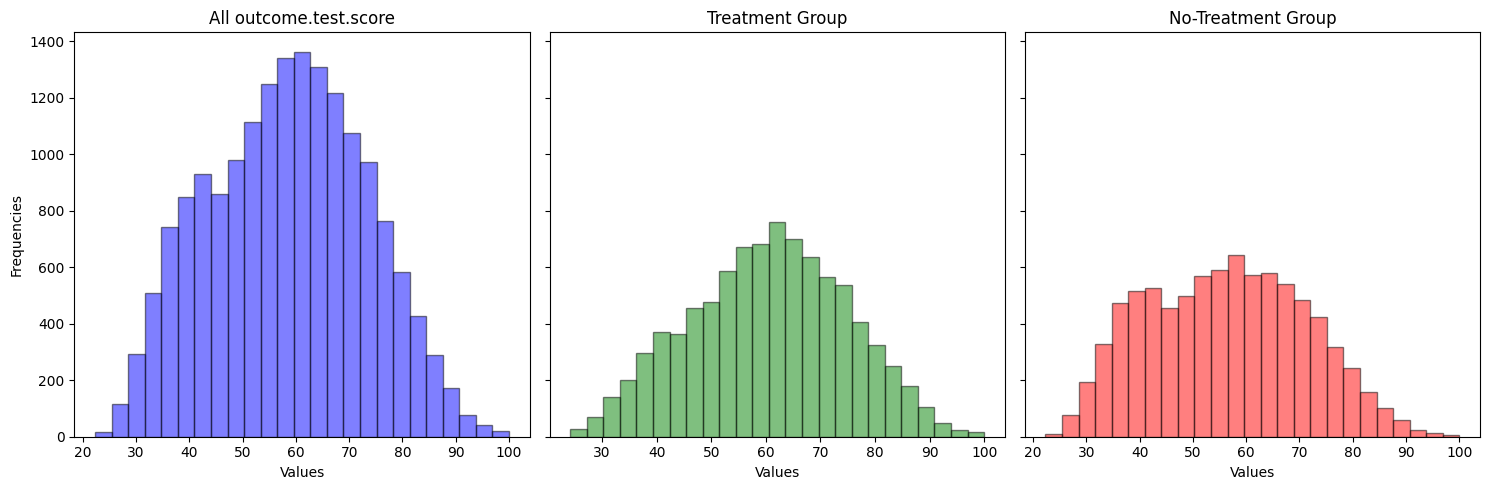

In [ ]:
# Plotting the distribution of our target variable, with the respect treatment and not treatemnt

treatment_Y = Y[X['treatment'] == 1]
notreatment_Y = Y[X['treatment'] == 0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # 1 row, 3 columns

axes[0].hist(Y, bins=25, color='blue', edgecolor='black', alpha=0.5)
axes[0].set_title("All outcome.test.score")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Frequencies")

axes[1].hist(treatment_Y, bins=25, color='green', edgecolor='black', alpha=0.5)
axes[1].set_title("Treatment Group")
axes[1].set_xlabel("Values")

axes[2].hist(notreatment_Y, bins=25, color='red', edgecolor='black', alpha=0.5)
axes[2].set_title("No-Treatment Group")
axes[2].set_xlabel("Values")

plt.tight_layout()
plt.show()

11. (1 point) Next, create your training and your test set. For this assignment, we’re going to use almost the entire dataset as the test set: set aside 90% of the data for this test set. This will make your life easier as we iterate on models. By only training on a small fraction of the data, this process will be a lot faster1. Assume that the data is i.i.d. for the purposes of this assignment, so you don’t need to do anything special in splitting the data.
In the real world, you wouldn’t want to have a split like this. It would be more common to have something like 30% of the data in the test set, but the size is usually determined by how accurately you need to know the error properties of your model.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=123)
print(X.shape)
print(X_train.shape)

(17299, 14)
(1729, 14)



12. (2 points) The next task is to define how we’re going to (1) impute missing data, (2) standardize the data and (3) fit the model. Write a function that has just one argument: regularization strength. This function should chain together your imputation strategy (SimpleImputer), your standardization strat- egy (StandardScaler) and the model class we want to estimate. In our case, that’s Ridge regression2! The way you create this chain is through what scikit-learn refers to as a “Pipeline”. In particular, you should pass each of these instantiated objects into a call to make pipeline. A function that just standardizes features and runs OLS would look like the following:

In [88]:
def create_ols_pipeline(regularization_strength):
    
    return make_pipeline(SimpleImputer(strategy = 'mean'), 
                         StandardScaler(),
                         Ridge(regularization_strength))


13. (2 points) Using the pipeline you created, fit a ridge regression where the regularization pa- rameter is alpha = 0.1 on the (entire) training set.
Fitting and predicting with this pipeline works exactly the same as if you had directly instan- tiated a Ridge model directly (i.e. the fit() and predict() methods work just the same.

In [91]:
model = create_ols_pipeline(0.1)
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

14. (1 point) Use the KFold class to construct a set of 10 folds to be used for cross-validation. We create this ahead of time because we want to use the exact same folds for every value of the hyperparameters (and every model) that we test so that we compare them, apples to apples.

In [104]:
kf = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 173  174  175 ... 1726 1727 1728]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172]
Fold 1:
  Train: index=[   0    1    2 ... 1726 1727 1728]
  Test:  index=[173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 20

15. (2 points) Using the training data, use cross-validation to choose a good value of the regular- ization parameter. You should:
• Try a range of different values (e.g. 20 values between 10−6 and 106) and inspect the estimated mean squared error. You’ll want to choose values in a log-spaced grid (i.e. powers of 10). You can do this using numpy’s logspace function, e.g. np.logspace(-6, 6, num = 10, base = 10).
• Plot the MSE for each value, along with standard errors.

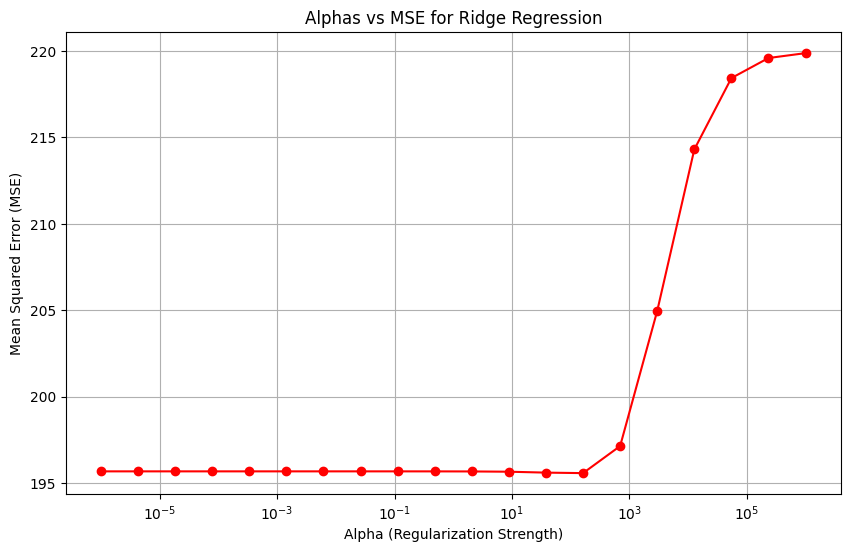

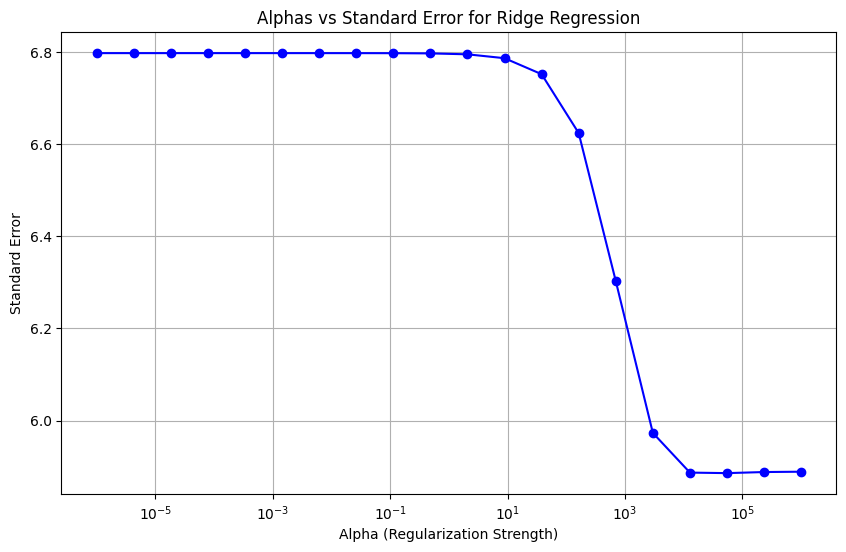

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer 

alphas = np.logspace(-6, 6, num = 20, base = 10)
mses_total = []
standarderror = []
for alpha in alphas:
    
    mses  = cross_val_score(create_ols_pipeline(alpha), X_train, y_train, cv = kf, scoring=make_scorer(mean_squared_error))
    mses_total.append(np.mean(mses))
    standarderror.append(np.std(mses) / np.sqrt(mses.shape[0]))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mses_total, marker='o', color='r')
plt.xscale('log') 
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alphas vs MSE for Ridge Regression')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, standarderror, marker='o', color='b')
plt.xscale('log') 
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Standard Error')
plt.title('Alphas vs Standard Error for Ridge Regression')
plt.grid(True)
plt.show()


6. (1 point) Point out which value of the regularization parameter (and therefore which model) you would choose to use based on these results.

#### Answer:

In both of the previous graphs, we see that there is a similar pattern in values ranging from 10^2 to 10^4. In the MSE graph, we see that the error increases with alphas higher than 10^3, however the standard error decreases. 

This represents a trade-off that we have to take into consideration when deciding which model to choose. If prediction is more important than consistency, we would choose the model with lower MSE, meaning alpha lower than 10^3. However, if we want consistency we would choose alphas higher than 10^3.




17. (1 point) Next, create a new version of your function which replaces ridge regression with Lasso.


In [139]:
def create_ols_pipeline(regularization_strength, model):

    if model == 'Ridge':

        model = Ridge(regularization_strength)


    elif model == 'Lasso':

        model = Lasso(regularization_strength)
    
    return make_pipeline(SimpleImputer(strategy = 'mean'), 
                         StandardScaler(),
                         model)

18. (2 points) Find the cross-validated MSE for a range of values of the regularization parameter alpha (again, on a log-spaced grid).

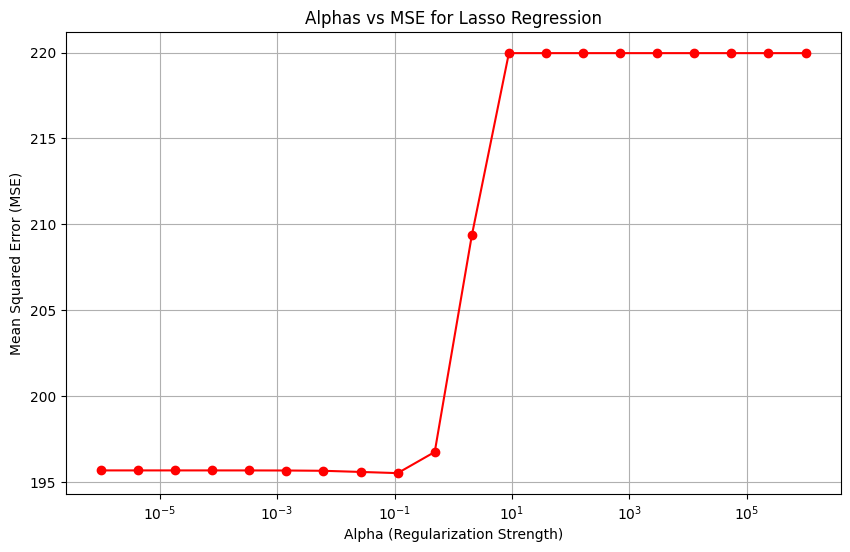

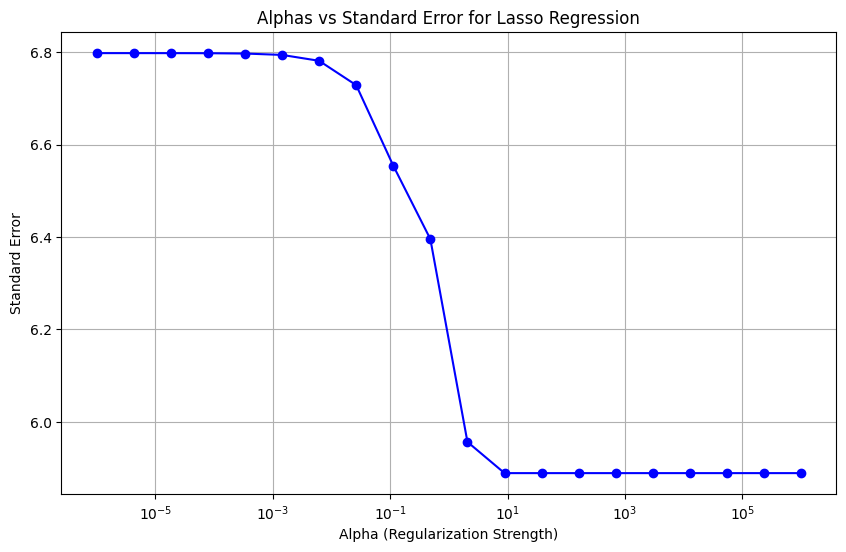

In [140]:
alphas = np.logspace(-6, 6, num = 20, base = 10)
mses_total = []
standarderror = []
for alpha in alphas:
    
    mses  = cross_val_score(create_ols_pipeline(alpha,'Lasso'), X_train, y_train, cv = kf, scoring=make_scorer(mean_squared_error))
    mses_total.append(np.mean(mses))
    standarderror.append(np.std(mses) / np.sqrt(mses.shape[0]))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mses_total, marker='o', color='r')
plt.xscale('log') 
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alphas vs MSE for Lasso Regression')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, standarderror, marker='o', color='b')
plt.xscale('log') 
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Standard Error')
plt.title('Alphas vs Standard Error for Lasso Regression')
plt.grid(True)
plt.show()

19. (1 point) Calculate the error in the test set for both your best Ridge and Lasso model. Which is better?

Based on our previous results we want to focus on the alpha that gives the lower value MSE for both models.
In this case the lowest MSE for the two models is an alpha of 10^-3



In [149]:
alpha = 1.43844989e-03

model_ridge = create_ols_pipeline(alpha, 'Ridge')
model_ridge.fit(X_train, y_train)
y_predict_ridge = model_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_predict_ridge)
print("Mean Squared Error Ridge:", mse_ridge)

model_lasso = create_ols_pipeline(alpha, 'Lasso')
model_lasso.fit(X_train, y_train)
y_predict_lasso = model_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_predict_lasso)
print("Mean Squared Error Lasso:", mse_lasso)


Mean Squared Error Ridge: 189.19203252838398
Mean Squared Error Lasso: 189.1919426328673


Based on the results, both models perform in a equal manner with the alpha that we selected and the amount of test split. This may be happen when we use the same alpha and both penalization techniques arrive at similar values for the parameters of the functions